# Questão 1
## Diferencie os conceitos de amostragem e quantização no processo de digitalização de uma imagem e a consequência desses processos na imagem digital.

A amostragem e quantização são processos que fazem parte da aquisição da imagem digital. Numa imagem capturada a partir de um sinal analógico observam-se ruídos de sinal. Essa imagem é chamada continua e precisa ser convertida para um sinal digital (pdi01_introdução: pag 35).

A imagem continua pode ser dividida em vários quadradinhos, conhecidos como pixels. Esse processo de dividir a imagem em pixels se chama amostragem. Quanto menos pixels forem usados para representar a imagem pior é sua qualidade (imagem pixelada). Em resumo, amostragem define quantos pixels usamos para representar a imagem (pdi01_introdução: pag 29).

Após dividir a imagem deve-se definir a cor que será “pintado” cada pixel. No mundo digital, não dá para representar infinitas variações de cor, então simplificamos: escolhemos um número limitado de cores ou tons de cinza. Esse processo é a quantização. Quantização define quantas cores ou tons diferentes cada pixel pode ter.

Na quantização, cada pixel é atribuído a um valor numérico que varia dentro de uma escala predefinida (ex.: 256 niveis em uma imagem de 8 bits). Quanto maior a quantização mais precisa será a representação de cores da imagem **(pdi01_introdução: pag 51/57)**.


#Questão 2


**As matrizes abaixo correspondem às componentes RGB de uma imagem.**

**Matriz R**
\begin{bmatrix}
255 & 240 & 200 & 150 & 120 \\
230 & 220 & 180 & 160 & 100 \\
210 & 190 & 170 & 145 & 90 \\
170 & 160 & 140 & 130 & 80 \\
185 & 165 & 155 & 135 & 122 \\
\end{bmatrix}

**Matriz G**
\begin{bmatrix}
255 & 240 & 230 & 235 & 210 \\
240 & 245 & 250 & 255 & 180 \\
240 & 245 & 250 & 255 & 180 \\
240 & 245 & 250 & 255 & 180 \\
255 & 240 & 230 & 235 & 210 \\
\end{bmatrix}

**Matriz B**
\begin{bmatrix}
255 & 255 & 200 & 180 & 160 \\
245 & 230 & 190 & 140 & 120 \\
245 & 230 & 190 & 140 & 120 \\
245 & 230 & 190 & 140 & 120 \\
255 & 200 & 180 & 160 & 160 \\
\end{bmatrix}

**Calcule a imagem em tons de cinza resultante para essas três matrizes, criada:**

1. **através da Média;**
2. **através do uso de pesos conforme o slide 46 da aula de cores.**

**Comente os resultados que você encontrou.**

Primeiramente é necessário importar as bibliotecas que serão utilizadas e carregar as matrizes:

In [ ]:
import numpy as np
from math import ceil

# Definindo as matrizes R, G e B
R = np.array([
    [255, 240, 200, 150, 120],
    [230, 220, 180, 160, 100],
    [210, 190, 170, 145, 90],
    [170, 160, 140, 130, 80],
    [185, 165, 155, 135, 122]
])

G = np.array([
    [255, 240, 230, 235, 210],
    [240, 245, 250, 255, 180],
    [240, 245, 250, 255, 180],
    [240, 245, 250, 255, 180],
    [255, 240, 230, 235, 210]
])

B = np.array([
    [255, 255, 200, 180, 160],
    [245, 230, 190, 140, 120],
    [245, 230, 190, 140, 120],
    [245, 230, 190, 140, 120],
    [255, 200, 180, 160, 160]
])


A função ``to_grayscale_average`` converte a imagem para tons de cinza usando a média aritmética simples dos três canais de cor (R, G e B). A fórmula ``(R + G + B) / 3`` calcula a média dos valores de vermelho, verde e azul para cada pixel, e ``np.round()`` arredonda o valor resultante. O resultado é então convertido para o tipo int para manter os valores de intensidade de pixel como inteiros.

In [ ]:
# Função para converter para tons de cinza pela média
def to_grayscale_average(R, G, B):
    return np.round((R + G + B) / 3).astype(int)

A função ``to_grayscale_weighted`` utiliza uma média ponderada para converter a imagem para tons de cinza. Neste caso, são aplicados pesos diferentes para cada canal de cor, refletindo a sensibilidade do olho humano a cada cor: vermelho (0.299), verde (0.587) e azul (0.114). Isso gera uma imagem mais fiel à percepção humana. A função arredonda o valor final e converte para inteiro.

In [ ]:
# Função para converter para tons de cinza com pesos
def to_grayscale_weighted(R, G, B):
    return np.round(0.299 * R + 0.587 * G + 0.114 * B).astype(int)

In [ ]:
# Conversão para tons de cinza
gray_avg = to_grayscale_average(R, G, B)
gray_weighted = to_grayscale_weighted(R, G, B)

# resultados
print("Imagem em tons de cinza pela Média:")
print(gray_avg)

print("\nImagem em tons de cinza com Pesos:")
print(gray_weighted)


Imagem em tons de cinza pela Média:
[[255 245 210 188 163]
 [238 232 207 185 133]
 [232 222 203 180 130]
 [218 212 193 175 127]
 [232 202 188 177 164]]

Imagem em tons de cinza com Pesos:
[[255 242 218 203 177]
 [238 236 222 213 149]
 [232 227 219 209 146]
 [220 218 210 205 143]
 [234 213 202 197 178]]


**Comparando os Resultados:**
A conversão pela média trata os três canais de forma igual. Ignorando o fator de percepção humana que detecta as cores vermelha e azul com mais dificuldade, dessa forma a imagem gerada pela média tem mais contraste enquanto a imagem convertida com pesos é mais suave e se adapta melhor a percepção da visão.

#Questão 3

Considere uma imagem em tons de cinza, cujo histograma, em uma escala de 0 a 255, tem o formato abaixo:

Cite duas informações que esse histograma traz sobre essa imagem, explicando sua resposta.

O  histograma é uma representação gráfica que mostra a  quantidade de pixels  de cada tom de cor numa escala de cores (no caso acima temos 256 tons).

Pode-se perceber nesse  grafico que existe uma  concentração de  pixels num intervalo pequeno  de tons, o que mostra um baixo contraste  na imagem, ou seja , é dificil diferenciar formas pois a s cores estão com tons muito próximos (pdi03_Histograma: pag 8).



#Questão 4
**Suponha que um filtro Box 3x3 (matriz no slide 105 da aula de filtragem) é usado para processar uma imagem. Em seguida, um filtro laplaciano 3x3 (slide 129 da aula de filtragem) é usado na imagem processada pelo filtro Box. Ou seja, temos:**

**_Final = Laplaciano(Box(I_original))**

**Calcule como deve ser uma máscara única que faria o mesmo que os filtros Laplaciano e Box. Apresente todos os cálculos.**





Filtro Box = \begin{bmatrix}
1/9 & 1/9 & 1/9\\
1/9 & 1/9 & 1/9\\
1/9 & 1/9 & 1/9\\
\end{bmatrix}

Filtro Laplaciano = \begin{bmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0\\
\end{bmatrix}

Para obter a máscara única que realiza as duas operações, deve-se realizar a operação de convolução. a matriz resultante terá dimensões 5x5 pois o filtro laplaciano deve percorrer todos os elementos do filtro box. A equação que define essa operação é descrita abaixo:



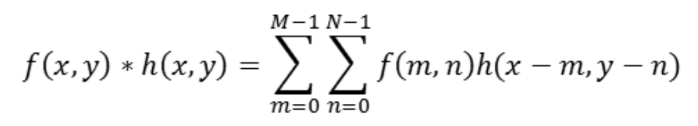

isolando o fator comum (1/9) do filtro box, os cálculos de cada elemento da máscara resultante estão mostrados a seguir:

In [ ]:
# H_resultante(0,0) = 1x0 = 0
# H_resultante(0,1) = 1x0 + 1x1 = 1
# H_resultante(0,2) = 1x0 + 1x1 + 1x0 = 1
# H_resultante(0,3) = 1x0 + 1x1 = 1
# H_resultante(0,4) = 1x0 = 0
# H_resultante(1,0) = 1x0 + 1x1 = 1
# H_resultante(1,1) = 1x0 + 1x1 + 1x1 + 1x(-4) = -2
# H_resultante(1,2) = 1x0 + 1x1 + 1x1 + 1x(-4) + 1x0 + 1x1 = -1
# H_resultante(1,3) = 1x0 + 1x1 + 1x1 + 1x(-4) = -2
# H_resultante(1,4) = 1x0 + 1x1 = 1
# H_resultante(2,0) = 1x0 + 1x1 + 1x0 = 1
# H_resultante(2,1) = 1x0 + 1x1 + 1x1 + 1x(-4) + 1x1 = -1
# H_resultante(2,2) = 1x0 + 1x1 + 1x1 + 1x(-4) + 1x1 + 1x0 + 1x1 + 1x0 = 0
# H_resultante(2,3) = 1x0 + 1x1 + 1x1 + 1x(-4) + 1x1 = -1
# H_resultante(2,4) = 1x0 + 1x1 + 1x0 = 1
# H_resultante(3,0) = 1x0 + 1x1 = 1
# H_resultante(3,1) = 1x0 + 1x1 + 1x1 + 1x(-4) = -2
# H_resultante(3,2) = 1x0 + 1x1 + 1x1 + 1x(-4) + 1x0 + 1x1 = -1
# H_resultante(3,3) = 1x0 + 1x1 + 1x1 + 1x(-4) = -2
# H_resultante(3,4) = 1x0 + 1x1 = 1
# H_resultante(4,0) = 1x0 = 0
# H_resultante(4,1) = 1x0 + 1x1 = 1
# H_resultante(4,2) = 1x0 + 1x1 + 1x0 = 1
# H_resultante(4,3) = 1x0 + 1x1 = 1
# H_resultante(4,4) = 1x0 = 0

Dessa forma, a matriz resultante da convolução, multiplicando pelo fator comum (1/9) será:

\begin{bmatrix}
0 & 1/9 & 1/9 & 1/9 & 0 \\
1/9 & -2/9 & -1/9 & -2/9 & 1/9 \\
1/9 & -1/9 & 0 & -1/9 & 1/9 \\
1/9 & -2/9 & -1/9 & -2/9 & 1/9 \\
0 & 1/9 & 1/9 & 1/9 & 0 \\
\end{bmatrix}

# Questão 5

**Qual a consequência, para o contraste de uma imagem (em tons de cinza com tons entre 0 e 255), a aplicação de um filtro passa-baixa? Explique**


A aplicação de um filtro passa-baixa em uma imagem em tons de cinza, com valores de intensidade entre 0 e 255, resulta em uma suavização da imagem que reduz o contraste geral. Esse tipo de filtro é projetado para atenuar as altas frequências presentes na imagem, ou seja, ele reduz as variações rápidas de intensidade que são responsáveis por detalhes finos e bordas nítidas.

**Funcionamento do Filtro Passa-Baixa:** Filtros passa-baixa, como o filtro de média (Box) e o filtro gaussiano, funcionam aplicando uma média ponderada dos pixels vizinhos. Eles substituem cada pixel pelo valor médio ou próximo da média de seus vizinhos, de modo que áreas com grandes variações passam a ter valores de intensidade mais homogêneos.
Altas frequências, que representam mudanças bruscas entre pixels claros e escuros, são suavizadas, enquanto baixas frequências, que representam variações graduais, são mantidas. Como resultado, as bordas e detalhes nítidos tendem a desaparecer, pois suas transições rápidas são reduzidas. (pdi04_Filtragem: pag 23-26)

**Impacto no Contraste:** O contraste de uma imagem depende das diferenças entre os tons claros e escuros. Quando aplicamos um filtro passa-baixa, essas diferenças são reduzidas, pois as áreas de brilho intenso e sombra passam a ter valores de intensidade mais próximos. Isso gera uma imagem com menos definição entre regiões de diferentes intensidades, tornando as transições menos perceptíveis e diminuindo a percepção de contraste.

Portanto, ao aplicar um filtro passa-baixa em uma imagem, o resultado é uma suavização da imagem que leva a uma redução do contraste. Esse processo é útil quando queremos remover ruídos ou suavizar uma imagem, mas não é ideal quando desejamos preservar ou realçar detalhes finos, como bordas ou texturas, que são importantes para a nitidez da imagem.


#Questão 6
## **Qual o resultado da aplicação dos filtros abaixo a uma imagem e cite uma aplicação para cada um:**

**Filtro Passa-Baixa:** O filtro passa-baixa suaviza a imagem ao reduzir as altas frequências, que são responsáveis por detalhes finos e bordas nítidas. Como resultado, a imagem torna-se mais suave, com menos ruído e uma aparência "lavada". As transições entre áreas claras e escuras se tornam mais gradativas, resultando em uma redução do contraste.
Uma aplicação comum do filtro passa-baixa é na redução de ruídos em imagens digitais, especialmente em fotos tiradas em condições de baixa luminosidade. Ele é amplamente utilizado em pré-processamento de imagens para preparar dados antes de outras operações, como a segmentação ou detecção de bordas.

**Filtro Passa-Alta:** O filtro passa-alta, por outro lado, destaca as altas frequências da imagem, realçando bordas e detalhes finos. Ao subtrair as componentes de baixa frequência (que correspondem a áreas mais suaves da imagem), o filtro produz uma imagem com maior nitidez e definição. O resultado é uma imagem com bordas mais marcadas e contrastes acentuados.

Um uso típico do filtro passa-alta é em técnicas de realce de bordas, que são essenciais em aplicações de visão computacional, como detecção de objetos e reconhecimento facial. Ao realçar bordas, o filtro ajuda a melhorar a precisão em algoritmos de reconhecimento e classificação.

**Filtro Passa-Faixa:** O filtro passa-faixa combina as propriedades dos filtros passa-baixa e passa-alta, permitindo a passagem de uma faixa específica de frequências. O resultado é uma imagem que mantém certas características de detalhes, enquanto remove componentes muito baixas ou muito altas. Isso pode resultar em uma imagem que destaca elementos em uma faixa de frequência específica, proporcionando uma representação equilibrada de detalhes.

Filtros passa-faixa são frequentemente usados em análise de texturas, onde é desejável focar em padrões específicos em uma imagem. Eles são úteis em processamento de imagens médicas, como a análise de imagens de ressonância magnética, onde diferentes faixas de frequências podem destacar características específicas de tecidos.


#Questão Teórico-prática 1
## Considere os dois filtros abaixo:

**Filtro H1**
\begin{bmatrix}
1/3 & 1/3 & 1/3 \\
\end{bmatrix}

**Filtro H2**
\begin{bmatrix}
1/3 \\
1/3 \\
1/3 \\
\end{bmatrix}

## Seja Im a imagem cameraman.bmp. Filtre ela com o filtro h1, e filtre o resultado com o filtro h2. Ou seja:

* Im_Saída = h2*(h1*Im)

## Agora, filtre da seguinte forma:

* Im_Saída = (h1*h2)*Im

## Compare seus dois resultados. O que você pode concluir sobre isso e por quê?

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [11]:
# Carregar a imagem em escala de cinza
img = cv2.imread('/content/cameraman.bmp', cv2.IMREAD_GRAYSCALE)

In [12]:
# Definir os filtros h1 e h2
h1 = np.array([[1, 1, 1]]) / 3  # Filtro horizontal
h2 = np.array([[1], [1], [1]]) / 3  # Filtro vertical

In [13]:
# Aplicar os filtros de forma sequencial
img_h1 = cv2.filter2D(img, -1, h1)  # Primeiro filtro h1 é aplicado na imagem com uma correlação cruzada
img_sequencial = cv2.filter2D(img_h1, -1, h2)  # Depois aplicar o filtro h2 no resultado anterior também com correlação cruzada

para aplicar o filtro combinado é necessário realizar uma convoluçao entre h1 e h2 que resulta em:

**Filtro combinado**
\begin{bmatrix}
1/9 & 1/9 & 1/9\\
1/9 & 1/9 & 1/9\\
1/9 & 1/9 & 1/9\\
\end{bmatrix}

In [14]:
# Aplicar o filtro combinado (h1 * h2)
h_combined = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
])
img_combined = cv2.filter2D(img, -1, h_combined)  # Aplicação do filtro combinado utilizando correlação cruzada

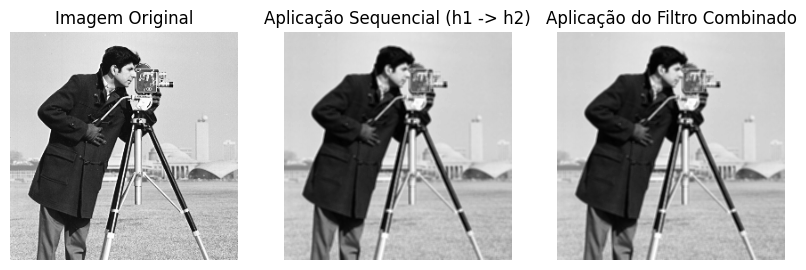

In [ ]:
# Mostrar as imagens
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_sequencial, cmap='gray')
plt.title('Aplicação Sequencial (h1 -> h2)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_combined, cmap='gray')
plt.title('Aplicação do Filtro Combinado')
plt.axis('off')

plt.show()

In [16]:
diferença = img_sequencial - img_combined
print(diferença)
print(np.max(diferença))
print(np.min(diferença))
print(np.mean(diferença))

[[  0   0   0 ... 255   0   0]
 [  0   0   1 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 ...
 [  0   0   0 ...   0   1   0]
 [  0   0 255 ...   0   1   0]
 [  0   0   0 ...   0   0   0]]
255
0
12.594512939453125


Como se pode perceber, a diferença entre as duas formas de aplicação dos filtros é bem pequena. essa diferença é causada por arredondamentos nas operações, no entanto, a percepção visual é que as duas imagens sofreram um borramento.

#Questão Prática 1
**Considere a imagem Tools.bmp. Através de técnicas de processamento de
imagens, crie um algoritmo que conte, de forma automática, quantas ferramentas
existem nessa imagem. Apesar da contagem de objetos em uma cena ser um
problema típico de visão computacional, ele pode ser resolvido por processamento
de imagens, dependendo das condições da cena.**

In [ ]:
from google.colab.patches import cv2_imshow

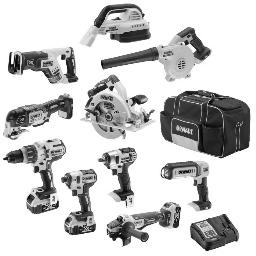

In [ ]:
# Carregar a imagem em escala de cinza
img = cv2.imread('/content/tools.bmp', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))
cv2_imshow(img)

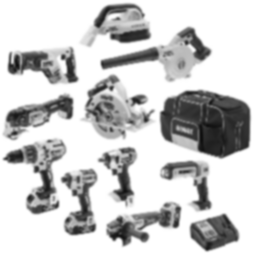

In [ ]:
# Suavização com filtro Gaussiano
img_blur = cv2.GaussianBlur(img, (5, 5), 0)
cv2_imshow(img_blur)

O proximo passo é binarizar a imagem. aqui é utilizado o threshold binário com valores entre 250-255, ou seja, tudo que for branco (como o fundo) ou muito próximo do branco será separado do restante.
na aplicação da função é utilizado o complemento da imagem pois queremos destacar os objetos e, dessa forma, o fundo ficará preto e os objetos ficam brancos.

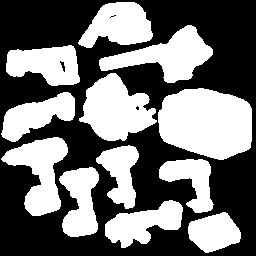

In [ ]:
# Aplicar limiar adaptativo para binarizar a imagem
img_binary =~ cv2.threshold(img_blur, 250, 255, cv2.THRESH_BINARY)[1] #obtem o complemento da imagem (tudo o que é branco ou bem próximo do branco fica preto)
cv2_imshow(img_binary)

Para contar a quantidade de ferramentas será utilizada a função connectedComponents do OpenCV. esta função encontra areas conectadas numa imagem.
na nossa figura, após a binarização os objetos estão conectados pela mesma cor (branco).


In [ ]:
qtd_tools = cv2.connectedComponents(img_binary, 8, cv2.CV_32S)
print(f'Quantidade de ferramentas: {qtd_tools[0] - 1}') # subtrai 1 pois o método detecta o fundo como um objeto também

Quantidade de ferramentas: 12


#Questão Prática 2
Na imagem alumgrns.bmp, implemente um algoritmo para contar
automaticamente, sem informação prévia do usuário, quantas regiões de
diferentes texturas existem na imagem aproximadamente.

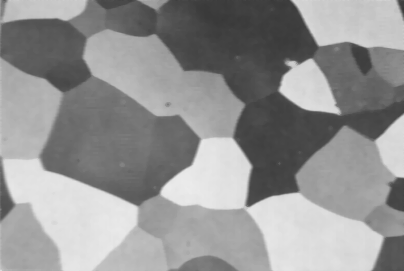

In [ ]:
# Carregar a imagem em escala de cinza
img = cv2.imread('/content/alumgrns.bmp', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

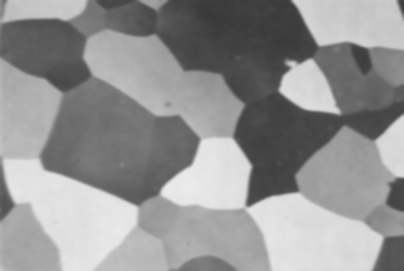

In [ ]:
# Suavização com filtro Gaussiano
img_blur = cv2.GaussianBlur(img, (5, 5), 0)
cv2_imshow(img_blur)

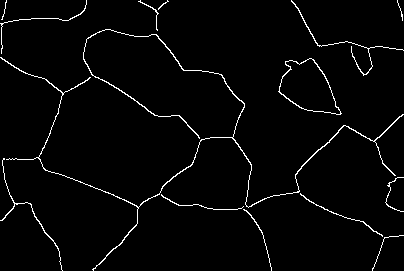

In [ ]:
# Utilizando o método de canny para detecção de bordas
edges = cv2.Canny(img_blur, 20, 180) #parametros de threshold1 e threshold2 foram obtidos experimentalmente
cv2_imshow(edges)

A seguir é utilizada a função ``cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)``. essa função aplica a operação de fechamento, que consiste em uma dilatação seguida de uma erosão. Isso ajuda a fechar pequenos buracos nas bordas detectadas e a conectar regiões disjuntas próximas.

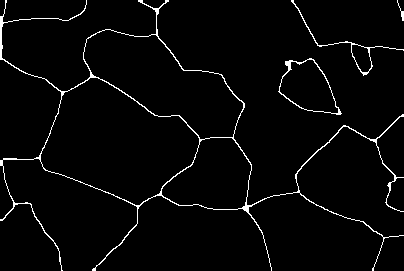

In [ ]:
kernel = np.ones((5, 5), np.uint8)
closed_img = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed_img)

In [ ]:
qtd_text = cv2.connectedComponents(~closed_img, 8, cv2.CV_32S)
print(f'Quantidade de regiões de diferentes texturas: {qtd_text[0]}')

Quantidade de regiões de diferentes texturas: 23


#Questão 3 - A

#Questão 3 - B

#Questão 3 - C

In [7]:
import cv2
import os

image_folder = '/content/CME_18'

blurred_images = []
sharp_images = []

laplacian_threshold = 40 # parametro obtido após testes (tentativa e erro)

for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is not None:
        laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var() #Aplicação do filtro laplaciano para ressaltar bordas

        if laplacian_var < laplacian_threshold:
            blurred_images.append(image_name)
        else:
            sharp_images.append(image_name)
    else:
        print(f"Imagem não carregada: {image_name}")


print("Imagens borradas:", blurred_images)
print("Imagens nítidas:", sharp_images)

Imagens borradas: ['CME_18_3.jpg']
Imagens nítidas: ['CME_18_2.jpg', 'CME_18_1.jpg']


#Questão 3 - D